In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Fetch data from sqlite3 to pandas dataframe

In [8]:
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

In [9]:

FETCH_BOOK_QUERY = "SELECT `id`, `title`, `publisher`, `author`, `image`, `category_id`, `available` FROM `libraryapp_book` "

book_list = pd.read_sql_query(FETCH_BOOK_QUERY, conn)
book_list.head()

,id,title,publisher,author,image,category_id,available
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0
1,6,DBA,ram,thapa,book/pos6.jpg,2,1
2,7,cryptography,ram,thapa,book/baag.jpg,1,1
3,8,The Hunger Games,Harper Collins Collins,Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,3,7
4,9,Harry Potter and the Philosopher's Stone,Harper Collins Collins,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022m...,4,24


In [10]:
book_list.count()

id             205
title          205
publisher      205
author         205
image          205
category_id    205
available      205
dtype: int64

In [11]:
# rename book list dataframe columns
books = book_list.rename(
    {'id': 'book_id', 'title': 'book_title', 'image': 'book_image'}, axis=1)
books

,book_id,book_title,publisher,author,book_image,category_id,available
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0
1,6,DBA,ram,thapa,book/pos6.jpg,2,1
2,7,cryptography,ram,thapa,book/baag.jpg,1,1
3,8,The Hunger Games,Harper Collins Collins,Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,3,7
4,9,Harry Potter and the Philosopher's Stone,Harper Collins Collins,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022m...,4,24
...,...,...,...,...,...,...,...
200,205,"The Devil in the White City: Murder, Magic, an...",New Directions,"Erik Larson, Tony Goldwyn",https://images.gr-assets.com/books/1312066724m...,3,47
201,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26
202,207,The Chronicles of Narnia,Penguin Books Ltd. (London),"C.S. Lewis, Pauline Baynes",https://images.gr-assets.com/books/1449868701m...,3,30
203,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49


In [12]:
books_category = pd.read_sql_query("SELECT `id` as `category_id`, `title` as `category_title`, `image` as `category_image` FROM `libraryapp_bookcategory`", conn)

books_category.head()

,category_id,category_title,category_image
0,1,interseting,bookcategory/download.jpeg
1,2,educational,bookcategory/e1.jpg
2,3,Fiction,https://www.google.com/url?sa=i&url=https%3A%2...
3,4,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...


In [13]:
# merge books and book_category
books_data = pd.merge(books, books_category, on='category_id')
books_data

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg
1,6,DBA,ram,thapa,book/pos6.jpg,2,1,educational,bookcategory/e1.jpg
2,209,Networking,Pearson,Unknown,book/alone-tree-sunset-qe.jpg,2,3,educational,bookcategory/e1.jpg
3,7,cryptography,ram,thapa,book/baag.jpg,1,1,interseting,bookcategory/download.jpeg
4,8,The Hunger Games,Harper Collins Collins,Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,3,7,Fiction,https://www.google.com/url?sa=i&url=https%3A%2...
...,...,...,...,...,...,...,...,...,...
200,197,One for the Money,Penguin Books,Janet Evanovich,https://images.gr-assets.com/books/1316730230m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...
201,202,Die Verwandlung,Penguin Books,"Franz Kafka, Stanley Corngold",https://images.gr-assets.com/books/1359061917m...,4,6,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...
202,203,The Titan's Curse,Henry Holt & Company,Rick Riordan,https://images.gr-assets.com/books/1361038385m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...
203,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...


In [14]:
book_ratings = pd.read_sql_query("SELECT `id`, `rating`, `book_id`, `user_id` from `libraryapp_bookrating` ", conn)
book_ratings.head()

,id,rating,book_id,user_id
0,1,3,5,5
1,2,4,5,6
2,3,4,6,6
3,4,4,5,6
4,5,3,5,5


# Into Collabarative Filtering
---
### Merge book_list and book_rating

In [15]:
books_with_rating = pd.merge(books_data, book_ratings, on='book_id')
books_with_rating

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image,id,rating,user_id
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,1,3,5
1,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,2,4,6
2,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,4,4,6
3,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,5,3,5
4,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
238,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,194,4,8
239,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,207,5,7
240,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,56,4,6
241,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,233,4,8


In [16]:
books_with_rating.groupby('book_title')['rating'].count()

book_title
 The Fellowship of the Ring                                   2
A Christmas Carol                                             2
A Clockwork Orange                                            1
A Feast for Crows                                             2
A Game of Thrones                                             2
                                                             ..
Where the Wild Things Are                                     3
Wicked: The Life and Times of the Wicked Witch of the West    1
Wuthering Heights                                             1
cryptography                                                  4
Анна Каренина                                                 2
Name: rating, Length: 131, dtype: int64

In [38]:
ratings = pd.DataFrame(books_with_rating.groupby('book_title')['rating'].mean())
ratings['total_rating'] = pd.DataFrame(books_with_rating.groupby('book_title')['rating'].count())
ratings

,rating,total_rating
book_title,,
The Fellowship of the Ring,4.500000,2
A Christmas Carol,3.000000,2
A Clockwork Orange,4.000000,1
A Feast for Crows,4.000000,2
A Game of Thrones,3.000000,2
...,...,...
Where the Wild Things Are,4.666667,3
Wicked: The Life and Times of the Wicked Witch of the West,5.000000,1
Wuthering Heights,5.000000,1


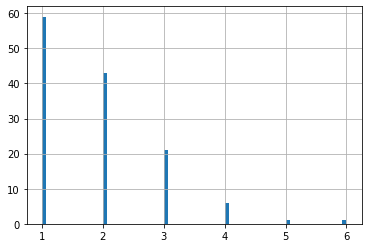

In [39]:
ratings['total_rating'].hist(bins=70)

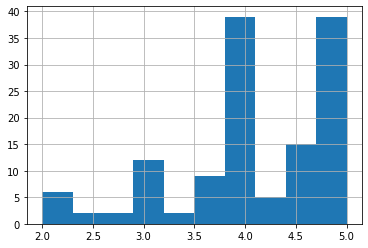

In [19]:
ratings['rating'].hist();

In [20]:
books_mat = books_with_rating.pivot_table(index='user_id',columns='book_title', values='rating')
books_mat

book_title,The Fellowship of the Ring,A Christmas Carol,A Clockwork Orange,A Feast for Crows,A Game of Thrones,A Storm of Swords,A Thousand Splendid Suns,A Time to Kill,A Walk to Remember,Allegiant,...,Twilight: The Complete Illustrated Movie Companion,Un di Velt Hot Geshvign,"Unbroken: A World War II Story of Survival, Resilience, and Redemption",Watchmen,Water for Elephants,Where the Wild Things Are,Wicked: The Life and Times of the Wicked Witch of the West,Wuthering Heights,cryptography,Анна Каренина
user_id,,,,,,,,,,,,,,,,,,,,,
5,NaN,1.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,5.0,NaN,NaN,NaN,2.0,4.0,5.0,NaN,5.0,...,4.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,2.666667,4.0
7,NaN,NaN,NaN,4.0,5.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,5.0,NaN,NaN,NaN
8,5.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,4.0,NaN,4.0,NaN,NaN,5.0,NaN,5.0
9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
len(books_mat.columns)

131

In [22]:
book_list_matrix = books_mat.fillna(0)
book_list_matrix.T

user_id,5,6,7,8,9,10,11,12,13,14
book_title,,,,,,,,,,
The Fellowship of the Ring,0.0,0.000000,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
A Christmas Carol,1.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Clockwork Orange,0.0,0.000000,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
A Feast for Crows,4.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Game of Thrones,0.0,0.000000,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Where the Wild Things Are,0.0,0.000000,4.5,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Wicked: The Life and Times of the Wicked Witch of the West,0.0,0.000000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.000000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
book_corr = np.corrcoef(book_list_matrix.T)
book_corr

array([[ 1.        , -0.19891695,  0.75346772, ...,  0.75346772,
        -0.24755823,  0.51367781],
       [-0.19891695,  1.        , -0.13363062, ..., -0.13363062,
         0.58435417,  0.53781251],
       [ 0.75346772, -0.13363062,  1.        , ...,  1.        ,
        -0.16630739,  0.75346772],
       ...,
       [ 0.75346772, -0.13363062,  1.        , ...,  1.        ,
        -0.16630739,  0.75346772],
       [-0.24755823,  0.58435417, -0.16630739, ..., -0.16630739,
         1.        ,  0.27021062],
       [ 0.51367781,  0.53781251,  0.75346772, ...,  0.75346772,
         0.27021062,  1.        ]])

In [24]:
book_titles = list(book_list_matrix)
book_titles

[' The Fellowship of the Ring',
 'A Christmas Carol',
 'A Clockwork Orange',
 'A Feast for Crows',
 'A Game of Thrones',
 'A Storm of Swords',
 'A Thousand Splendid Suns',
 'A Time to Kill',
 'A Walk to Remember',
 'Allegiant',
 'American Gods',
 'An Excellent conceited Tragedie of Romeo and Juliet',
 "Angela's Ashes: A Memoir",
 'Angels & Demons ',
 'Animal Farm: A Fairy Story',
 'Anne of Green Gables',
 'Atonement',
 'Bared to You',
 'Beautiful Creatures',
 'Blink: The Power of Thinking Without Thinking',
 'Brave New World',
 'Catching Fire',
 'Charlie and the Chocolate Factory',
 'Clockwork Angel',
 'DAA',
 'DBA',
 'Digital Fortress',
 'Divine Secrets of the Ya-Ya Sisterhood',
 'Dracula',
 'Dune',
 "Eat, pray, love: one woman's search for everything across Italy, India and Indonesia",
 'Eleanor & Park',
 'Fahrenheit 451',
 'Fifty Shades Freed',
 'Fight Club',
 'Frankenstein; or, The Modern Prometheus',
 'Girl with a Pearl Earring',
 'Gone Girl',
 'Gone with the Wind',
 'Great Expect

In [25]:
books_with_rating

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image,id,rating,user_id
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,1,3,5
1,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,2,4,6
2,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,4,4,6
3,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,5,3,5
4,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
238,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,194,4,8
239,206,Bared to You,Actes Sud,Sylvia Day,https://images.gr-assets.com/books/1477803272m...,4,26,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,207,5,7
240,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,56,4,6
241,208,Twilight: The Complete Illustrated Movie Compa...,Business Plus,Mark Cotta Vaz,https://images.gr-assets.com/books/1352539022m...,4,49,Fantasy,https://www.google.com/url?sa=i&url=https%3A%2...,233,4,8


In [26]:
# def get_recommendation(user_id, corr_limit):
#     user_rated_books = books_with_rating.loc[books_with_rating['user_id'] == user_id]['book_title']
#     print("User Rated Book: ", user_rated_books)
#     books_list = list(user_rated_books)
#     print('********************')
#     print('Book List: ', books_list)
#     # self.get_recommendation_list(book_list)
#     book_similarities = np.zeros(book_corr.shape[0])

#     # print(book_similarities)
#     book_preferences = []
#     for book in books_list:
#         print("book: ", book)
#         book_index = book_titles.index(book)
#         print("index :", book_index)
#         book_similarities += book_corr[book_index]
#         print("Book Similarities:", book_similarities[book_index])

#     for i in range(len(book_titles)):
#         print("Iteration{}: {}".format(i, book_similarities[i]))
#         if book_similarities[i] > corr_limit :
#             # pass book title
#             book_preferences.append(book_titles[i])
#             print("Added: ", book_titles[i])

#     # return sorted(book_preferences, key= lambda x: x[1],      reverse=True)
#     print("Similarities Matrix:", book_similarities)
#     return book_preferences



In [27]:
book_corr

array([[ 1.        , -0.19891695,  0.75346772, ...,  0.75346772,
        -0.24755823,  0.51367781],
       [-0.19891695,  1.        , -0.13363062, ..., -0.13363062,
         0.58435417,  0.53781251],
       [ 0.75346772, -0.13363062,  1.        , ...,  1.        ,
        -0.16630739,  0.75346772],
       ...,
       [ 0.75346772, -0.13363062,  1.        , ...,  1.        ,
        -0.16630739,  0.75346772],
       [-0.24755823,  0.58435417, -0.16630739, ..., -0.16630739,
         1.        ,  0.27021062],
       [ 0.51367781,  0.53781251,  0.75346772, ...,  0.75346772,
         0.27021062,  1.        ]])

In [28]:
def get_recommendation(user_id, corr_limit):
    user_rated_books = books_with_rating.loc[books_with_rating['user_id'] == user_id]['book_title']
    print("User Rated Book: ", user_rated_books)
    books_list = list(user_rated_books)

    # books_list = ['The Old Man and the Sea']

    print('********************')
    print('Book List: ', books_list)
    # self.get_recommendation_list(book_list)
    book_similarities = np.zeros(book_corr.shape[0])

    # print(book_similarities)
    book_preferences = []
    for book in books_list:
        print("book: ", book)
        book_index = book_titles.index(book)
        print("index :", book_index)
        book_similarities += book_corr[book_index]
        print("Book Similarities:", book_similarities[book_index])

    for i in range(len(book_titles)):
        print("Iteration{}: {}".format(i, book_similarities[i]))
        if book_similarities[i] > corr_limit and book_titles[i] not in books_list :
            # pass book title
            book_preferences.append(book_titles[i])
            print("Added: ", book_titles[i], "Similarities: ", book_similarities[i])

    # return sorted(book_preferences, key= lambda x: x[1],      reverse=True)
    print("Similarities Matrix:", book_similarities)
    return book_preferences



## Test Recommendation Engine

In [29]:
preferred_books = get_recommendation(11, 0.2)
print("Recommended:", preferred_books)

User Rated Book:  13          cryptography
236    The Titan's Curse
Name: book_title, dtype: object
********************
Book List:  ['cryptography', "The Titan's Curse"]
book:  cryptography
index : 129
Book Similarities: 0.9999999999999998
book:  The Titan's Curse
index : 118
Book Similarities: 1.7141435129085614
Iteration0: -0.41295358567850826
Iteration1: 0.45072354566809375
Added:  A Christmas Carol Similarities:  0.45072354566809375
Iteration2: -0.2774185045281734
Iteration3: -0.4161277567922601
Iteration4: -0.3336444632235922
Iteration5: 0.5052045233168253
Added:  A Storm of Swords Similarities:  0.5052045233168253
Iteration6: 0.25150422142585077
Added:  A Thousand Splendid Suns Similarities:  0.25150422142585077
Iteration7: 0.17083951409148895
Iteration8: -0.2774185045281734
Iteration9: 0.5052045233168253
Added:  Allegiant Similarities:  0.5052045233168253
Iteration10: -0.27741850452817346
Iteration11: -0.40076715995282985
Iteration12: -0.27741850452817346
Iteration13: -0.416127

In [30]:
rated_books = book_list_matrix['DAA']
rated_books
similarities_with_other = book_list_matrix.corrwith(rated_books).sort_values(ascending=False)
similarities_with_other.head(10)


book_title
A Thousand Splendid Suns                   1.000000
DAA                                        1.000000
Harry Potter and the Chamber of Secrets    0.975005
DBA                                        0.966474
Un di Velt Hot Geshvign                    0.960508
A Christmas Carol                          0.886004
Interview with the Vampire                 0.775880
Fight Club                                 0.775880
The Joy Luck Club                          0.775880
The Book Thief                             0.775880
dtype: float64

In [31]:
from collections import Iterable

def flattern(lst):
    for item in lst:
        if not isinstance(item, Iterable):
            yield item
        else:
            for child in flattern(item):
                yield child


In [32]:
book_list = ['DAA', 'DBA']
# book_list = ['The Old Man and the Sea']
preferred_books = []
correlation_level = 0.4
for book in book_list:
    rated_books = book_list_matrix[book]
    similar_books = book_list_matrix.corrwith(rated_books).sort_values(ascending=False)
    similar_books = similar_books.drop(labels=book_list)
    
    preferred_books.append(similar_books.head(10).index.tolist())

# preferred_books.append(similar_books.values > correlation_level.index.tolist())
# preferred_books
preferred_books
# similar_books

[['A Thousand Splendid Suns',
  'Harry Potter and the Chamber of Secrets',
  'Un di Velt Hot Geshvign',
  'A Christmas Carol',
  'Interview with the Vampire',
  'Fight Club',
  'The Joy Luck Club',
  'The Book Thief',
  'Steve Jobs',
  'The Road'],
 ['Un di Velt Hot Geshvign',
  'Harry Potter and the Chamber of Secrets',
  'A Thousand Splendid Suns',
  'The Pillars of the Earth',
  'The Old Man and the Sea',
  'Brave New World',
  'The Goldfinch',
  'Moby Dick; or, The Whale',
  'The Battle of the Labyrinth',
  'A Christmas Carol']]

In [33]:
result = []
for sublist in preferred_books:
    for item in sublist:
        result.append(item)

print(result)

['A Thousand Splendid Suns', 'Harry Potter and the Chamber of Secrets', 'Un di Velt Hot Geshvign', 'A Christmas Carol', 'Interview with the Vampire', 'Fight Club', 'The Joy Luck Club', 'The Book Thief', 'Steve Jobs', 'The Road', 'Un di Velt Hot Geshvign', 'Harry Potter and the Chamber of Secrets', 'A Thousand Splendid Suns', 'The Pillars of the Earth', 'The Old Man and the Sea', 'Brave New World', 'The Goldfinch', 'Moby Dick; or, The Whale', 'The Battle of the Labyrinth', 'A Christmas Carol']


>Recommendation Engine

In [34]:
# find similar book
similar_to_daa = book_mat.corrwith(daa_rating)
corr_daa = pd.DataFrame(similar_to_daa, columns=['correlation'])
corr_daa.dropna(inplace = True)
corr_daa

NameError: name 'book_mat' is not defined

### Merge book_list and book_category

In [35]:
book_data = pd.merge(book_list, book_category, on='category_id')
book_data.head()

NameError: name 'book_category' is not defined